# **Heart Disease Prediction using Machine Learning**



## **Takeaways**

### **The Heart Disease prediction will have the following key takeaways:**

### **1]Data insight:**
### As mentioned here we will be working with the heart disease detection dataset and we will be putting out interesting inferences from the data to derive some meaningful results.

### **2]EDA:**
### Exploratory data analysis is the key step for getting meaningful results.

### **3]Feature engineering:**
### After getting the insights from the data we have to alter the features so that they can move forward for the model building phase.

### **4]Model building:**
### In this phase, we will be building our Machine learning model for heart disease detection.
  
  ### **So let’s get started!**

## **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/heart.csv')

## **Taking care of missing values**

In [ ]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
heart.shape

(1025, 14)

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Treatment of duplicat values**

In [ ]:
heart_dup = heart.duplicated().any()
heart_dup

True

In [ ]:
heart = heart.drop_duplicates()

In [ ]:
heart_dup = heart.duplicated().any()
heart_dup

False

## **Exploratory Data Analysis**

###It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

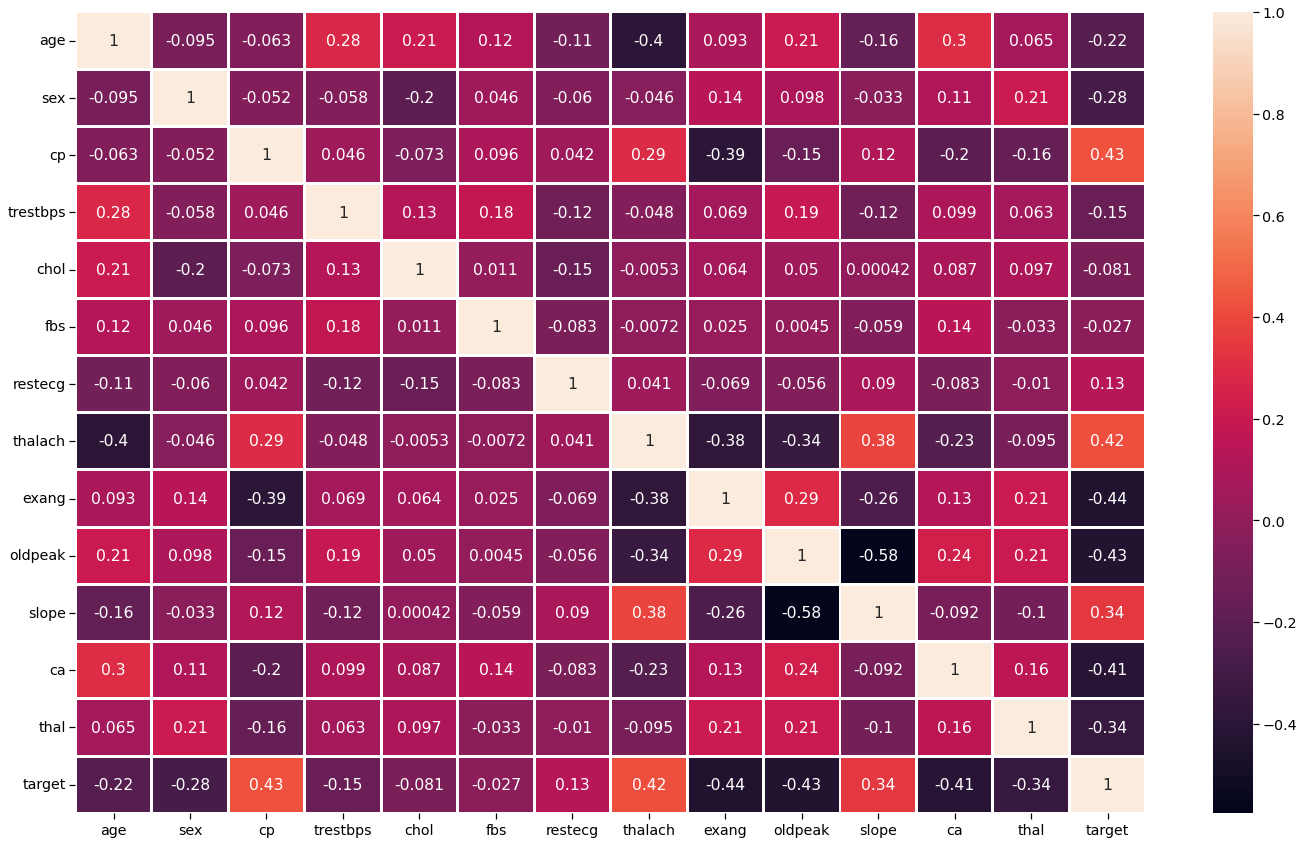

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart.corr(),annot=True,linewidth =2)
plt.tight_layout()

### By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

### So, let’s do this!

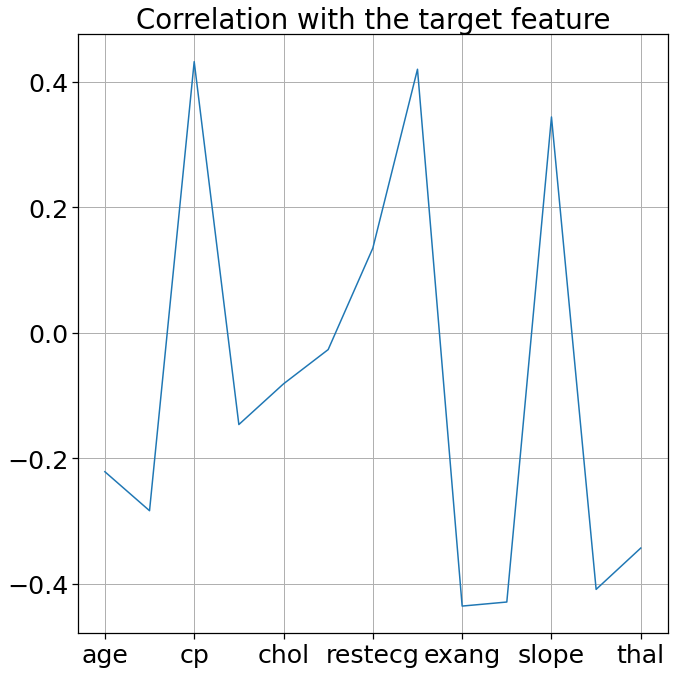

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
heart.drop('target', axis=1).corrwith(heart.target).plot(kind='line', grid=True, figsize=(10, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

### **Insights from the above graph are:**

### Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
### Other features are negatively correlated with the target feature.

## **Age(“age”) Analysis**

### Here we will be checking 10 ages and their counts

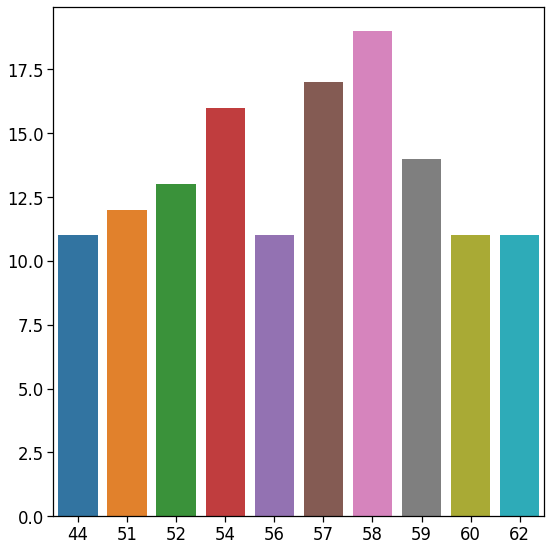

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=heart.age.value_counts()[:10].index,y=heart.age.value_counts()[:10].values)
plt.tight_layout()

### **Observation**

### Here we can see that the 58 age column has the highest frequency.

### Let’s check the range of age in the dataset.

In [ ]:
minAge=min(heart.age)
maxAge=max(heart.age)
meanAge=heart.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.420529801324506


### So we should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

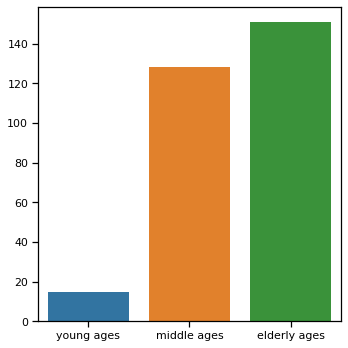

In [ ]:
Young = heart[(heart.age>=29)&(heart.age<40)]
Middle = heart[(heart.age>=40)&(heart.age<55)]
Elder = heart[(heart.age>55)]

plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.0)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

### **Insights from above graph**

###Here we can clearly see that elderly aged people are most affected by Heart Diseasesanf young ones are least affected



###Lets have a look to below pie chart

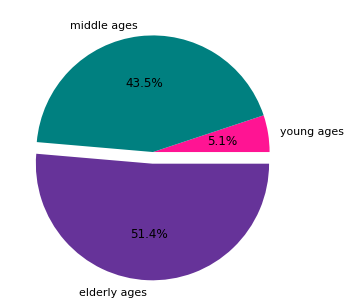

In [ ]:
colors = ['deeppink','teal','rebeccapurple']
explode = [0,0,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.0)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## **Sex(“sex”) Feature Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


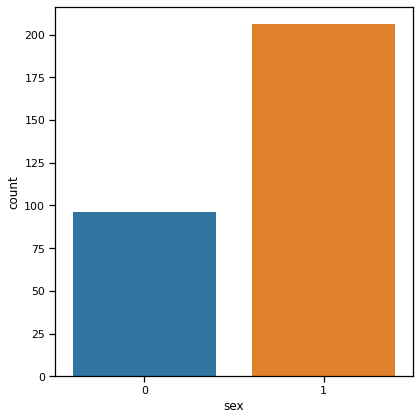

In [ ]:
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.0)
sns.countplot(heart['sex'])
plt.tight_layout()

##**Inference:**

### Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

### Now let’s plot the relation between sex and slope.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


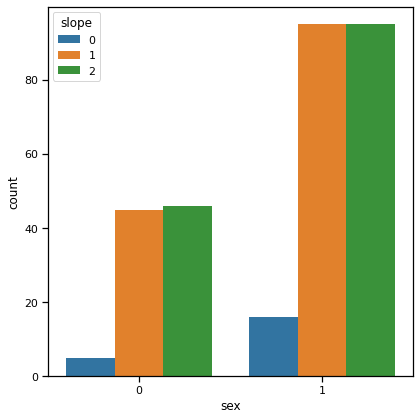

In [ ]:
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.0)
sns.countplot(heart['sex'],hue=heart["slope"])
plt.tight_layout()


### Here it is clearly visible that the slope value is higher in the case of males(1).

## **Chest Pain Type(“cp”) Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


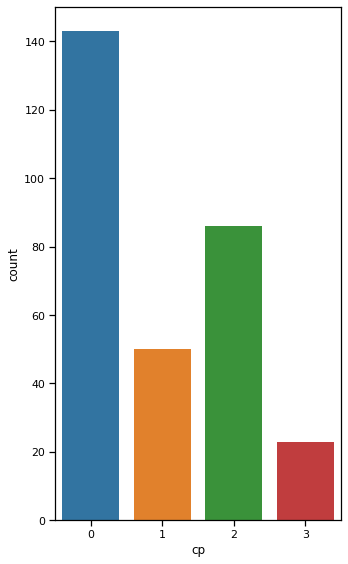

In [ ]:
plt.figure(figsize=(5,8))
sns.countplot(heart['cp'])
plt.tight_layout()

## **As seen, there are 4 types of chest pain**

### -> Status at least

### -> Condition slightly distressed

### -> Condition medium problem

### -> Condition too bad

## **Observations**

### People having the least chest pain are not likely to have heart disease.

### People having severe chest pain are likely to have heart disease.

## **Thal Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


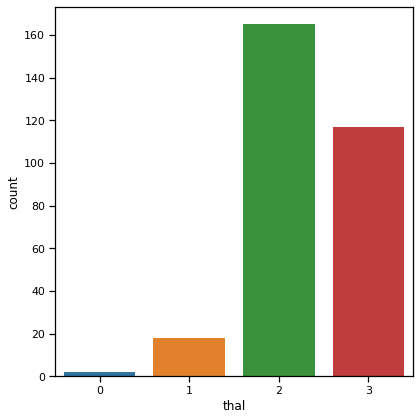

In [ ]:
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.0)
sns.countplot(heart['thal'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


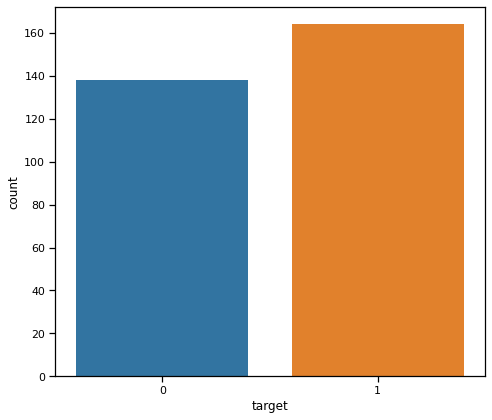

In [ ]:
plt.figure(figsize=(7,6))
sns.set_context('notebook',font_scale = 1.0)
sns.countplot(heart['target'])
plt.tight_layout()

## **Insights from above graphs**

###The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

##**Data Processing**

In [ ]:
cat_value = [] #categorical value column
cont_value = [] #numerical value column

for column in heart.columns:
  if heart[column].nunique() <= 10:
    cat_value.append(column)
  else:
    cont_value.append(column) 

In [ ]:
cat_value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_value

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

##**Encoding Categorical Data**

In [ ]:
cat_value

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
heart['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
cat_value.remove('sex')
cat_value.remove('target')
# bcoz they are already in binary format

ValueError: ignored

In [ ]:
heart = pd.get_dummies(heart, columns=cat_value , drop_first = True)

In [ ]:
heart.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


##**Feature scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
st = MinMaxScaler()
heart[cont_value] = st.fit_transform(heart[cont_value])

In [ ]:
heart.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.479167,1,0.292453,0.196347,0.740458,0.161290,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0.500000,1,0.433962,0.175799,0.641221,0.500000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.854167,1,0.481132,0.109589,0.412214,0.419355,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.666667,1,0.509434,0.175799,0.687023,0.000000,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.687500,0,0.415094,0.383562,0.267176,0.306452,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## **Splitting data into Training Set and Test Set**


### WE ARE USING TRAIN TEST SPLIT JUST TO EVALUATE PERFORMANCE OF THE MODEL

In [ ]:
X = heart.drop('target' , axis = 1)

In [ ]:
y = heart['target']

In [ ]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.479167,1,0.292453,0.196347,0.740458,0.161290,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0.500000,1,0.433962,0.175799,0.641221,0.500000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0.854167,1,0.481132,0.109589,0.412214,0.419355,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.666667,1,0.509434,0.175799,0.687023,0.000000,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.687500,0,0.415094,0.383562,0.267176,0.306452,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1,0.433962,0.216895,0.709924,0.000000,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,0.645833,1,0.292453,0.301370,0.534351,0.451613,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,0.375000,1,0.150943,0.340183,0.358779,0.161290,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,0.437500,0,0.150943,0.292237,0.671756,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

## **Logistic Regression**

In [ ]:
heart.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.479167,1,0.292453,0.196347,0.740458,0.161290,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0.500000,1,0.433962,0.175799,0.641221,0.500000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.854167,1,0.481132,0.109589,0.412214,0.419355,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.666667,1,0.509434,0.175799,0.687023,0.000000,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.687500,0,0.415094,0.383562,0.267176,0.306452,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


###**Our target varibale is categorical from here we will use classification model and calculate accuracy**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train , y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , y_pred1)

0.8439024390243902

## **Support Vector Classifer**

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train , y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred2)

0.8682926829268293

##**KNeighbor classifer**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn =KNeighborsClassifier()

In [ ]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred3)

0.848780487804878

##**lets check accuracy with different values**

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test , y_pred)

0.8195121951219512

##**Non Linear ML Algo**

In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
heart = heart.drop_duplicates()

In [ ]:
heart.shape

(302, 14)

In [ ]:
X = heart.drop('target' , axis = 1)
y = heart['target']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

##**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred4)

0.7213114754098361

### Accuracy : 70%

##**Random Forest Classifir**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred5)

0.819672131147541

### Accuracy : 85%

##**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train , y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gb.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred6)

0.8032786885245902

### Accuracy : 80%

### **Lets visualize the accuracy score of all models for better understanding**

In [ ]:
final_heart_data = pd.DataFrame({'Models':['LR' , 'SVM' , 'KNN' , 'DT' , 'RF' , 'GB'],
                                 'ACC': [accuracy_score(y_test , y_pred1),
                                        accuracy_score(y_test , y_pred2),
                                        accuracy_score(y_test , y_pred3),
                                        accuracy_score(y_test , y_pred4),
                                        accuracy_score(y_test , y_pred5),
                                        accuracy_score(y_test , y_pred6)]})

ValueError: ignored

In [ ]:
final_heart_data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


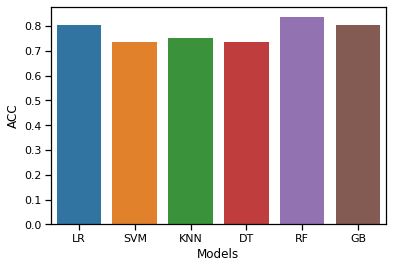

In [ ]:
sns.barplot(final_heart_data['Models'] , final_heart_data['ACC'])

###**WE CAN SEE RANDOM FOREST IS BEST MODEL FOR THIS DATASET AND IS ALMOST 85% ACCURATE**

###**FOR PRODUCTION PURPOSE WE HAVE TO TRAIN OUR ENTIRE DATASET**

###**SO LETS APPLY OUR BEST MODEL ON ENTIRE DATASET i.e  RANDOM FOREST CLASSIFIER**

In [ ]:
X = heart.drop('target' , axis = 1)
y = heart['target']

In [ ]:
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

##**PREDICTION ON OUR NEW DATA**

In [ ]:
new_heart_data = pd.DataFrame({
    'age':52, 
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3},index=[0])

In [ ]:
new_heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p = rf.predict(new_heart_data)
if p[0] == 0:
  print("No Disease")
else:
  print("Disease")

No Disease


## **So here our Machine Learning heart prediction Model is ready!!!**

## **THANK YOU** 